__собираем статистики по объявлениям__

_Evgeny S. Borisov <parser@mechanoid.su>_

In [1]:
# import re
# from tqdm.notebook import tqdm
import pandas as pd
import geopandas as gpd
import contextily as ctx

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
# tqdm.pandas()

In [3]:
# !ls -1 data

## считываем данные

In [4]:
data_file = 'data/data.pkl'

In [5]:
cols = ['title','adr','latitude','longitude','priceM','ts']
df = pd.read_pickle(data_file)
print(len(df))
df.sample(3)[cols]

7896


title                         adr  latitude  \
2779    3-к. квартира, 169 м², 2/6 эт.              улица Щорса, 4     44.61   
4209     1-к. квартира, 37 м², 6/6 эт.   улица Тараса Шевченко, 49     44.57   
7060  1-к. апартаменты, 81 м², 4/6 эт.         улица Пляж Омега, 8     44.60   

      longitude  priceM                  ts  
2779      33.52   19.90 2022-09-02 13:04:00  
4209      33.46    6.95 2022-09-05 14:02:00  
7060      33.44   18.90 2022-09-05 14:02:00

In [6]:
# берём самые свежие объявления
cols = ['title','adr','latitude','longitude','priceM']
df = df[ (df['ts']==df['ts'].max()) & (~df['latitude'].isnull()) ].reset_index(drop=True)
df[cols]

title  \
0          1-к. квартира, 29 м², 1/9 эт.   
1        1-к. квартира, 48,1 м², 3/8 эт.   
2        2-к. квартира, 77,9 м², 1/9 эт.   
3          2-к. квартира, 59 м², 6/9 эт.   
4        1-к. квартира, 33,5 м², 7/9 эт.   
...                                  ...   
3580  1-к. апартаменты, 66,1 м², 3/3 эт.   
3581     2-к. квартира, 79,9 м², 1/9 эт.   
3582     2-к. квартира, 77,8 м², 1/9 эт.   
3583     2-к. квартира, 77,8 м², 1/9 эт.   
3584       2-к. квартира, 81 м², 1/9 эт.   

                                                                                                  adr  \
0                                                               улица Токарева, 7 этап, блок-секция 1   
1                                                                                проспект Победы, 29В   
2                                                                            улица Горпищенко, д. 139   
3                                                               улица Токарева, 7 этап, блок-секция 2   
4                                                               улица Токарева, 7 этап, блок-секция 3   
...                                                                                               ...   
3580  Севастополь, Балаклавский район, Орлиновский муниципальный округ, Севастопольская зона ЮБК, 14А   
3581                                                            улица Токарева, 7 этап, блок-секция 3   
3582                                                            улица Токарева, 7 этап, блок-секция 2   
3583                                                            улица Токарева, 7 этап, блок-секция 1   
3584                                                            улица Токарева, 7 этап, блок-секция 1   

      latitude  longitude  priceM  
0        44.58      33.51    5.08  
1        44.58      33.56    7.21  
2        44.59      33.56    8.96  
3        44.58      33.51    8.26  
4        44.58      33.51    5.86  
...        ...        ...     ...  
3580     44.47      33.88   11.90  
3581     44.58      33.51   10.79  
3582     44.58      33.51   10.50  
3583     44.58      33.51   10.50  
3584     44.58      33.51   10.94  

[3585 rows x 5 columns]

In [7]:
gdf = gpd.GeoDataFrame( 
    df, # [['avito_id','title','adr','priceM','latitude','longitude']],
    geometry = gpd.points_from_xy(df['longitude'], df['latitude']),
    crs='epsg:4326', # WGS 84
)

gdf

avito_id                               title     price  \
0     2505211407       1-к. квартира, 29 м², 1/9 эт.   5075000   
1     2409803367     1-к. квартира, 48,1 м², 3/8 эт.   7215000   
2     2537301754     2-к. квартира, 77,9 м², 1/9 эт.   8958500   
3     2505519806       2-к. квартира, 59 м², 6/9 эт.   8260000   
4     2505012783     1-к. квартира, 33,5 м², 7/9 эт.   5862500   
...          ...                                 ...       ...   
3580  2233193027  1-к. апартаменты, 66,1 м², 3/3 эт.  11900000   
3581  2505394982     2-к. квартира, 79,9 м², 1/9 эт.  10786500   
3582  2505118152     2-к. квартира, 77,8 м², 1/9 эт.  10503000   
3583  2505647135     2-к. квартира, 77,8 м², 1/9 эт.  10503000   
3584  2504965141       2-к. квартира, 81 м², 1/9 эт.  10935000   

              obj_name  \
0      ЖК «Доброгород»   
1     ЖК «Корабельный»   
2        ЖК «Ореховый»   
3      ЖК «Доброгород»   
4      ЖК «Доброгород»   
...                ...   
3580               NaN   
3581   ЖК «Доброгород»   
3582   ЖК «Доброгород»   
3583   ЖК «Доброгород»   
3584   ЖК «Доброгород»   

                                                                                                  adr  \
0                                                               улица Токарева, 7 этап, блок-секция 1   
1                                                                                проспект Победы, 29В   
2                                                                            улица Горпищенко, д. 139   
3                                                               улица Токарева, 7 этап, блок-секция 2   
4                                                               улица Токарева, 7 этап, блок-секция 3   
...                                                                                               ...   
3580  Севастополь, Балаклавский район, Орлиновский муниципальный округ, Севастопольская зона ЮБК, 14А   
3581                                                            улица Токарева, 7 этап, блок-секция 3   
3582                                                            улица Токарева, 7 этап, блок-секция 2   
3583                                                            улица Токарева, 7 этап, блок-секция 1   
3584                                                            улица Токарева, 7 этап, блок-секция 1   

                                                                                                                                                                                                                                                                   description  \
0       Крупнейший в Севастополе семейный микрорайон «Доброгород»! \n\nПобедитель всероссийской премии «Топ ЖК 2021» в номинации «Лучший жилой комплекс». \n\nИпотека с господдержкой, рассрочка от Застройщика. \n\n«Доброгород» по праву считается лучшим жилым кварталом Се   
1     Рассрочка от Застройщика до конца строительства! Без % и переплаты. \n\nПервый взнос по рассрочке- 30%. \n\nИпотека с господдержкой и семейная ипотека от 4,5%. \n\nКомфортная 1-комнатная квартира, с большим застеклённым балконом. \n\nОбратите внимание на удобную,    
2       Квартира в готовом доме! Шикарная кухня-столовая 28 кв. Метров! \n\nДоступны все виды ипотечного кредитования. \n\nДом, с индивидуальным автономным отоплением (современные газовые котлы в каждой квартире). \n\nСреди достоинств этого места — развитая инфраструкту   
3       Крупнейший в Севастополе семейный микрорайон «Доброгород»! \n\nПобедитель всероссийской премии «Топ ЖК 2021» в номинации «Лучший жилой комплекс». \n\nИпотека с господдержкой, рассрочка от Застройщика. \n\n«Доброгород» по праву считается лучшим жилым кварталом Се   
4       Крупнейший в Севастополе семейный микрорайон «Доброгород»! \n\nПобедитель всероссийской премии «Топ ЖК 2021» в номинации «Лучший жилой комплекс». \n\nИпотека с господдержкой, рассрочка от Застройщика. \n\n«Доброгород» по праву считается лучшим жилым кварталом Се 

In [ ]:
# ctx.add_basemap(
#     gdf.plot(figsize=(10,10), alpha=.5, edgecolor='k'), crs=gdf.crs, 
#     zoom=15,
#     # source=ctx.providers.Stamen.TonerLite, 
#     source=ctx.providers.OpenStreetMap.Mapnik,
# )

<AxesSubplot:>

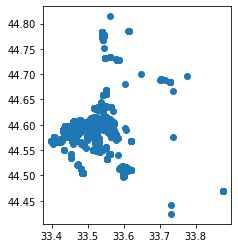

In [8]:
gdf.plot()

## ограничиваем по район поиска

In [30]:
from shapely.geometry import Polygon

frames_path = 'data/frames/'

frames_index = pd.read_csv(f'{frames_path}/index.csv',sep='\t')
frames_index
swap_coo = lambda coo : [ (c[1],c[0]) for c in coo ]
df2poly = lambda df : Polygon(swap_coo(df.values))

gdf_frames = gpd.GeoDataFrame([ 
    { 
     'area_name':nm, 
     'geometry': df2poly( pd.read_csv(f'{frames_path}/{f}',header=None) )
    } 
    for nm,f in frames_index.values
    ],crs='epsg:4326',)

gdf_frames['area_id'] = range(len(gdf_frames))

gdf_frames

area_name  \
0  Севастополь, микрорайон Острякова   
1    Севастополь, парк 60-летия СССР   
2    Севастополь, Хрусталёва/Хрюкина   

                                                                                                                                                                                                                                                                                                                                                                              geometry  \
0  POLYGON ((33.51463 44.58418, 33.51257 44.58011, 33.51454 44.57376, 33.51896 44.56842, 33.52098 44.55919, 33.52689 44.54997, 33.53307 44.55046, 33.53118 44.55589, 33.53435 44.55749, 33.52826 44.56737, 33.53255 44.56942, 33.53303 44.57298, 33.52835 44.57442, 33.52852 44.57451, 33.52230 44.57691, 33.52569 44.57856, 33.52041 44.58675, 33.51723 44.58675, 33.51463 44.58418))   
1                                                                                                                                                                                                                                                         POLYGON ((33.51508 44.58371, 33.51284 44.58015, 33.51478 44.57462, 33.51974 44.57540, 33.51784 44.58382, 33.51508 44.58371))   
2                                                                                                                                                                                                                                                         POLYGON ((33.51584 44.57288, 33.51931 44.56851, 33.51964 44.56516, 33.52384 44.56654, 33.51983 44.57472, 33.51584 44.57288))   

   area_id  
0        0  
1        1  
2        2

<AxesSubplot:>

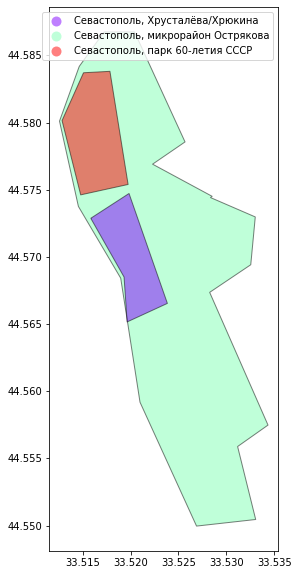

In [31]:
gdf_frames.plot('area_name', legend=True, cmap='rainbow',alpha=.5, edgecolor='k',figsize=(10,10),)  

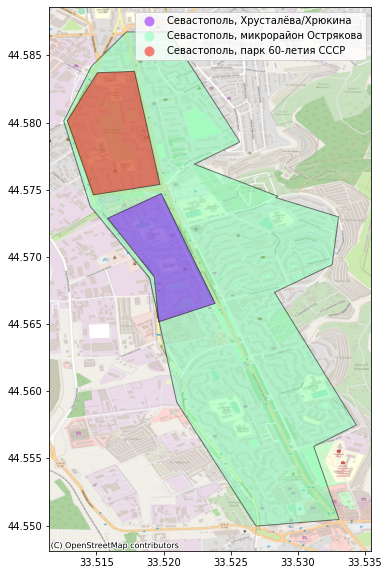

In [32]:
ctx.add_basemap(
    gdf_frames.plot('area_name',legend=True,cmap='rainbow',figsize=(10,10),alpha=.5,edgecolor='k'), 
    crs=gdf.crs, 
    zoom=16,
    # source=ctx.providers.Stamen.TonerLite,
    source=ctx.providers.OpenStreetMap.Mapnik,
)

### гексагональная сетка

In [81]:
import h3
    
def cover_grid_hexagonal(gmtr,cell_size=9,crs='EPSG:4326'):
    polygonise = lambda hex_id: Polygon( h3.h3_to_geo_boundary( hex_id, geo_json=True)  )
    hexs = list(h3.polyfill( gmtr.__geo_interface__, cell_size, geo_json_conformant = True ))
    return gpd.GeoDataFrame(
        { 'hex_id': hexs,  'geometry': list(map(polygonise, hexs)), },
        crs=crs, 
    )

gdf_grid = cover_grid_hexagonal( gdf_frames.query('area_id==0').geometry.values[0] )

gdf_grid.sample(2)

hex_id  \
9   892d2894283ffff   
16  892d289421bffff   

                                                                                                                                           geometry  
9   POLYGON ((33.51872 44.57764, 33.51839 44.57585, 33.52048 44.57469, 33.52289 44.57531, 33.52321 44.57710, 33.52113 44.57827, 33.51872 44.57764))  
16  POLYGON ((33.52673 44.57120, 33.52641 44.56941, 33.52849 44.56825, 33.53090 44.56888, 33.53123 44.57067, 33.52914 44.57183, 33.52673 44.57120))

In [82]:
# gdf_grid.plot()

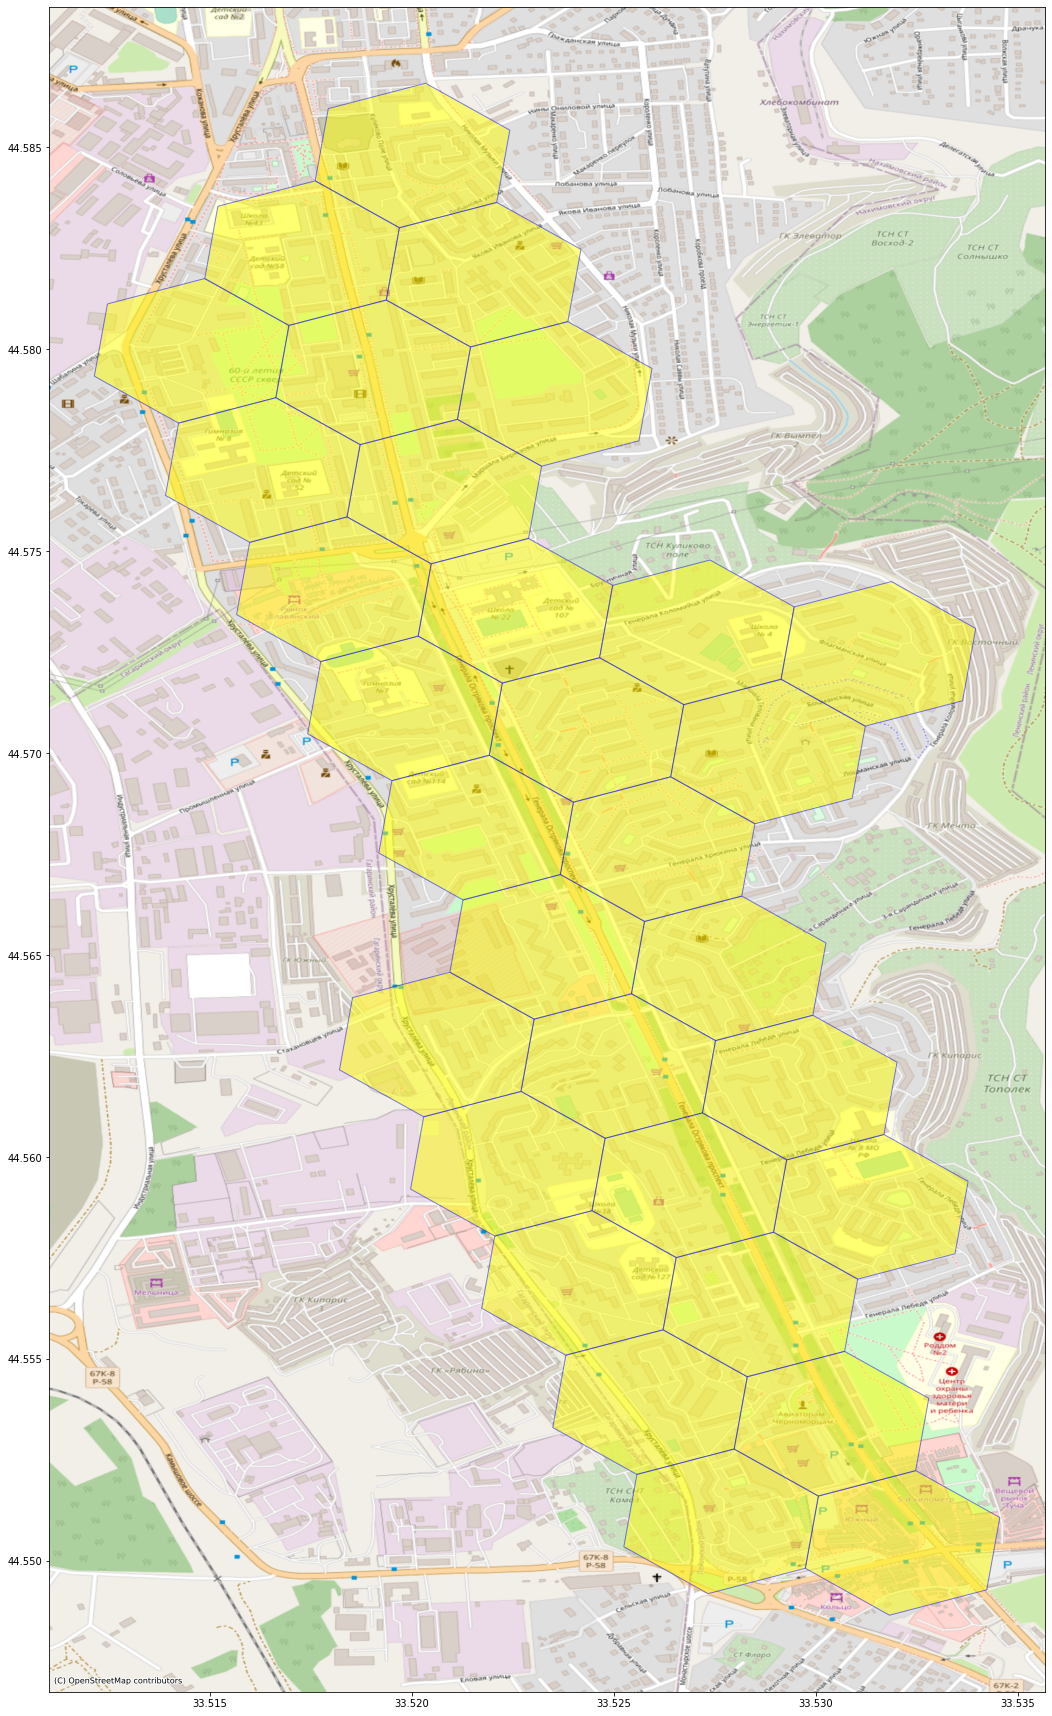

In [83]:
ctx.add_basemap( 
    gdf_grid.plot(alpha=.5,color='yellow',edgecolors='blue',figsize=(31,31),), 
    source=ctx.providers.OpenStreetMap.Mapnik,
    crs=gdf_grid.crs, 
    zoom=16,
)

## медиана цены

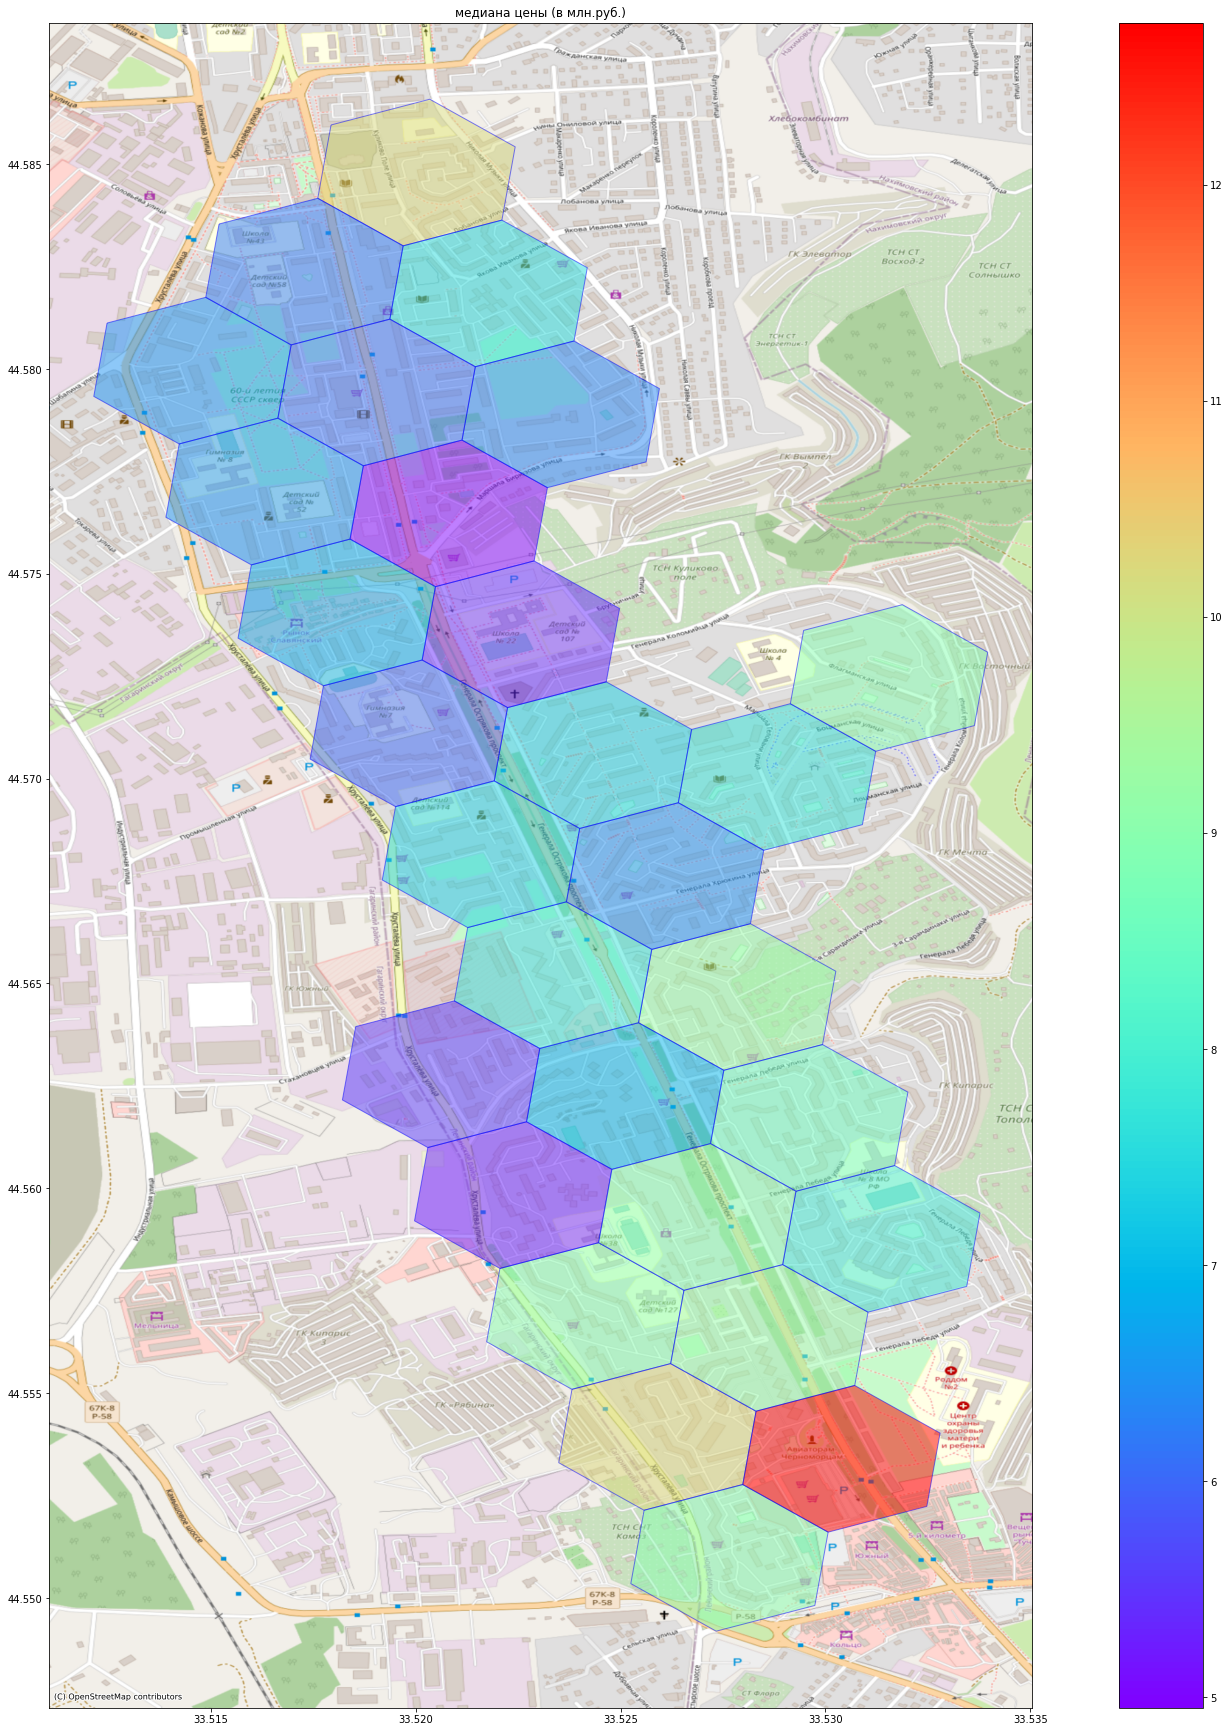

In [89]:
# gdf_ = gdf.sjoin(gdf_grid,how='inner',predicate='within')
# gdf_.plot()

ax = gdf_grid.merge(
    gdf
    .sjoin(gdf_grid,how='inner',predicate='within')    
    [['hex_id','priceM']]
    .groupby(['hex_id'])
    .median()
    .reset_index(),
    on=['hex_id'],
).plot(
    'priceM', 
    alpha=.5,
    edgecolors='blue',
    cmap='rainbow',
    figsize=(31,31), 
    legend=True, 
)

ax.set(title='медиана цены (в млн.руб.)')

ctx.add_basemap( 
    ax,
    source=ctx.providers.OpenStreetMap.Mapnik,
    crs=gdf_grid.crs, 
    zoom=16,
)

## количество предложений

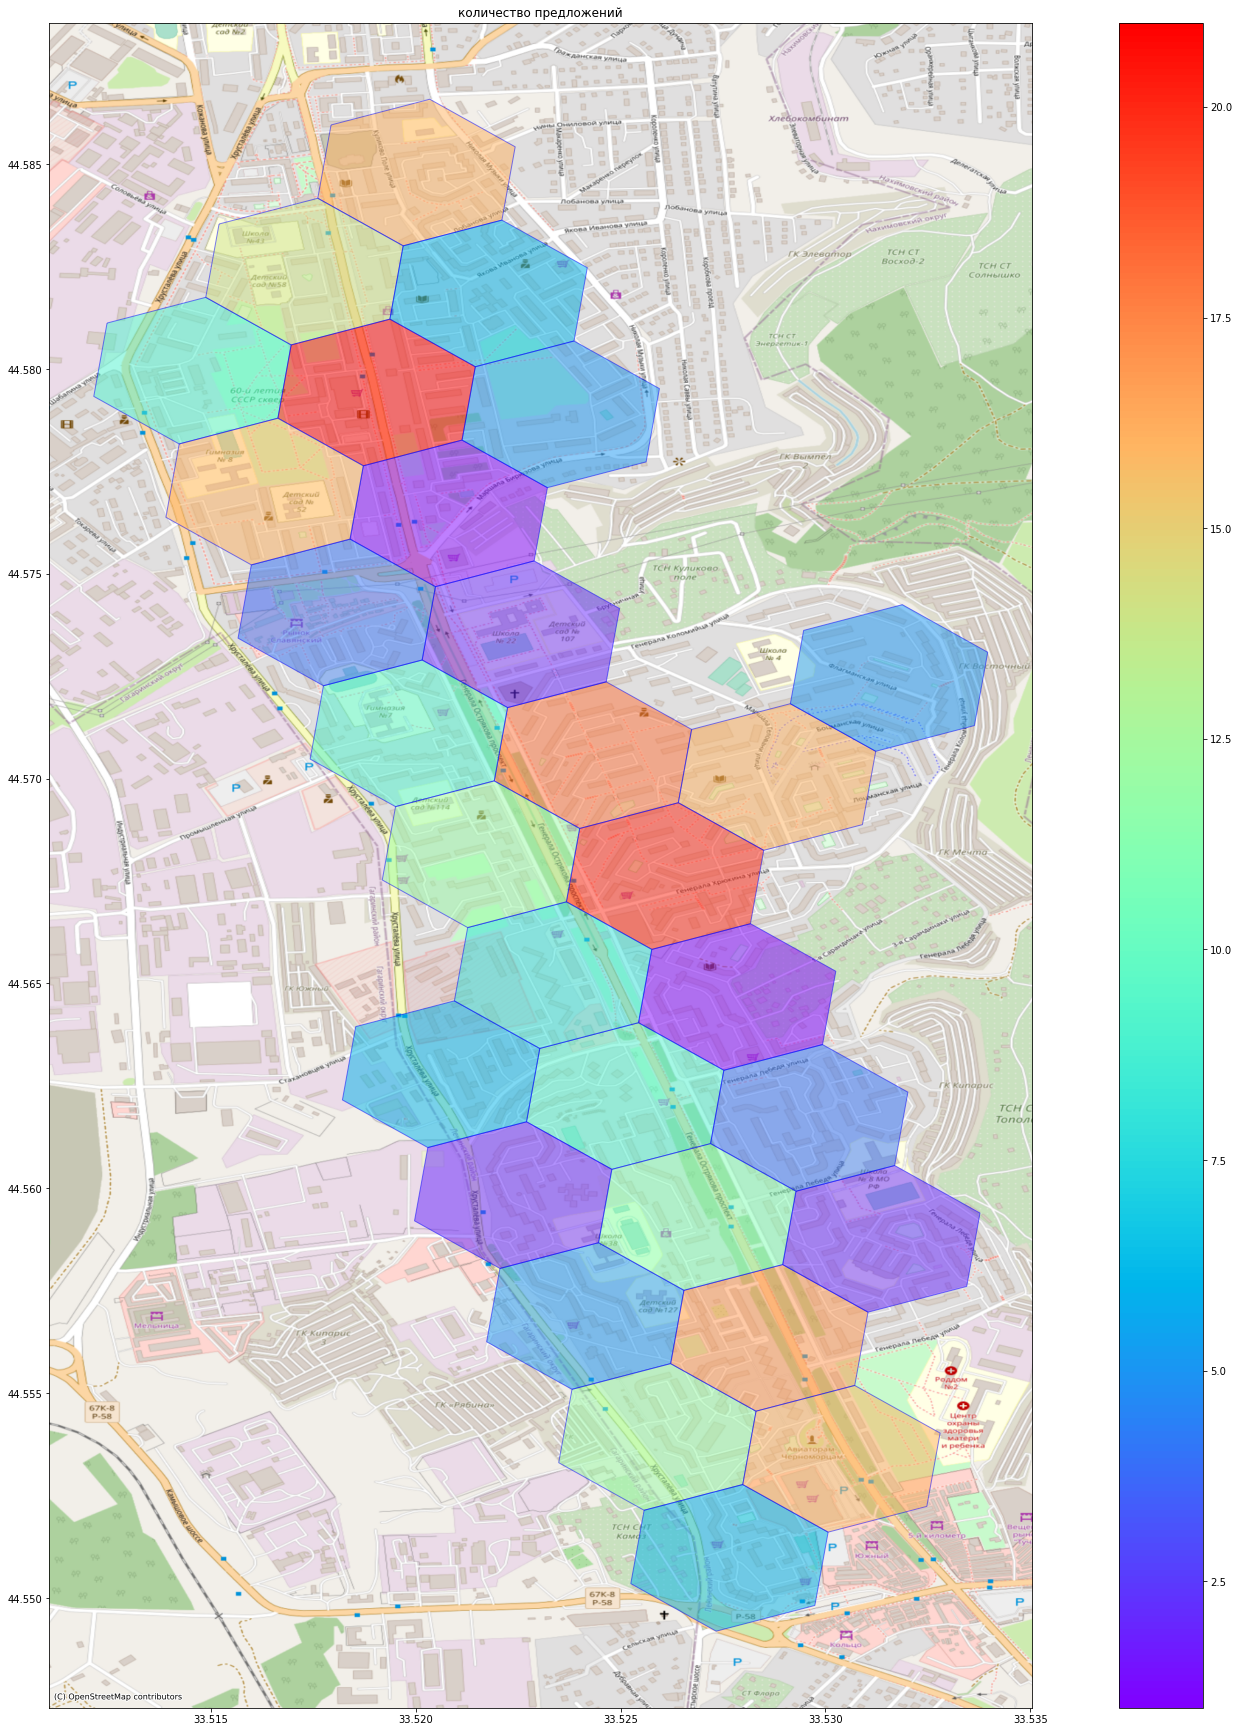

In [90]:
# gdf_ = gdf.sjoin(gdf_grid,how='inner',predicate='within')
# gdf_.plot()

ax = gdf_grid.merge(
    gdf
    .sjoin(gdf_grid,how='inner',predicate='within')    
    [['hex_id','priceM']]
    .groupby(['hex_id'])
    .count()
    .reset_index(),
    on=['hex_id'],
).plot(
    'priceM', 
    alpha=.5,
    edgecolors='blue',
    cmap='rainbow',
    figsize=(31,31), 
    legend=True, 
)

ax.set(title='количество предложений')

ctx.add_basemap( 
    ax,
    source=ctx.providers.OpenStreetMap.Mapnik,
    crs=gdf_grid.crs, 
    zoom=16,
)

In [57]:
# gdf

---

In [ ]:
# ctx.providers.Stamen.Watercolor
# ctx.providers.Stamen.TonerLabels
# ctx.providers.Stamen.TonerLite
# ctx.providers.OpenStreetMap.BlackAndWhite

---

In [ ]:
# from folium import Map
# from folium.features import GeoJson
# from folium.plugins import HeatMap

In [ ]:
# gjson = gdf_.to_json()

# start_pos = (44.578330, 33.516509)

# Map( start_pos, zoom_start=14, ).add_child( GeoJson(gjson) )
# # Map( start_pos, zoom_start=14, ).add_child( gdf_[['latitude','longitude',]].values )

In [ ]:
# Map(
#     location=start_pos,
#     zoom_start=15,
# ).add_child( 
#     HeatMap( gdf_[['latitude','longitude',]],radius=12.,min_opacity=3. )
# )


---

In [ ]:
# df_ = df.query(
#     '~(is_studio|is_apartment|is_part|is_auction|is_openspace|is_SNT|is_roof)'
#     '&(nrooms==2)'
# )

# df_[['priceM']].describe().T    

In [ ]:
# cols = ['adr', 'priceM', 'nrooms', 'floor', 'nfloors', 'area', 'description', 'avito_id',]
# df_[cols].sort_values(by=['priceM'])[:20]

---

In [ ]:
# gdf_frames[gdf_frames['area_id']==0]

---

In [ ]:
# gdf = gdf.sjoin(gdf_frames[gdf_frames['area_id']==0], how='inner', predicate='within')

In [ ]:
# gdf.plot(figsize=(10,10), alpha=.5, edgecolor='k'), 

In [ ]:
# ctx.add_basemap(
#     # gdf.plot('area_name', legend=True, cmap='rainbow',figsize=(10,10), alpha=.5, edgecolor='k'), 
#     gdf.plot(figsize=(10,10), alpha=.5, edgecolor='k'), 
#     crs=gdf.crs, 
#     zoom=16,
#     # source=ctx.providers.Stamen.TonerLite,
#     source=ctx.providers.OpenStreetMap.Mapnik,
# )

In [ ]:
# gdf[['priceM']].describe().T

In [ ]:
# plt_param = {
# 'alpha':.5, 
# 'color':'yellow', 
# 'edgecolors':'blue', 
# 'figsize':(31,31),
# }

# ctx_param = {
# 'source': ctx.providers.OpenStreetMap.Mapnik,
# #'source': ctx.providers.Stamen.TonerLite,
# 'zoom':16,    
# }

In [ ]:
# def cover_grid_hexagonal(gtr,cell_size=10,crs='EPSG:4326'):
#     polygonise = lambda hex_id: Polygon( h3.h3_to_geo_boundary( hex_id, geo_json=True)  )
#     hexs = h3.polyfill( gtr.__geo_interface__, cell_size, geo_json_conformant = True )
#     return gpd.GeoSeries(
#         list(map(polygonise, hexs)), 
#         index=hexs, 
#         crs=crs, 
#     )